# Even More How-To Recipes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hotstepper as hs
import hotstepper.samples as samples

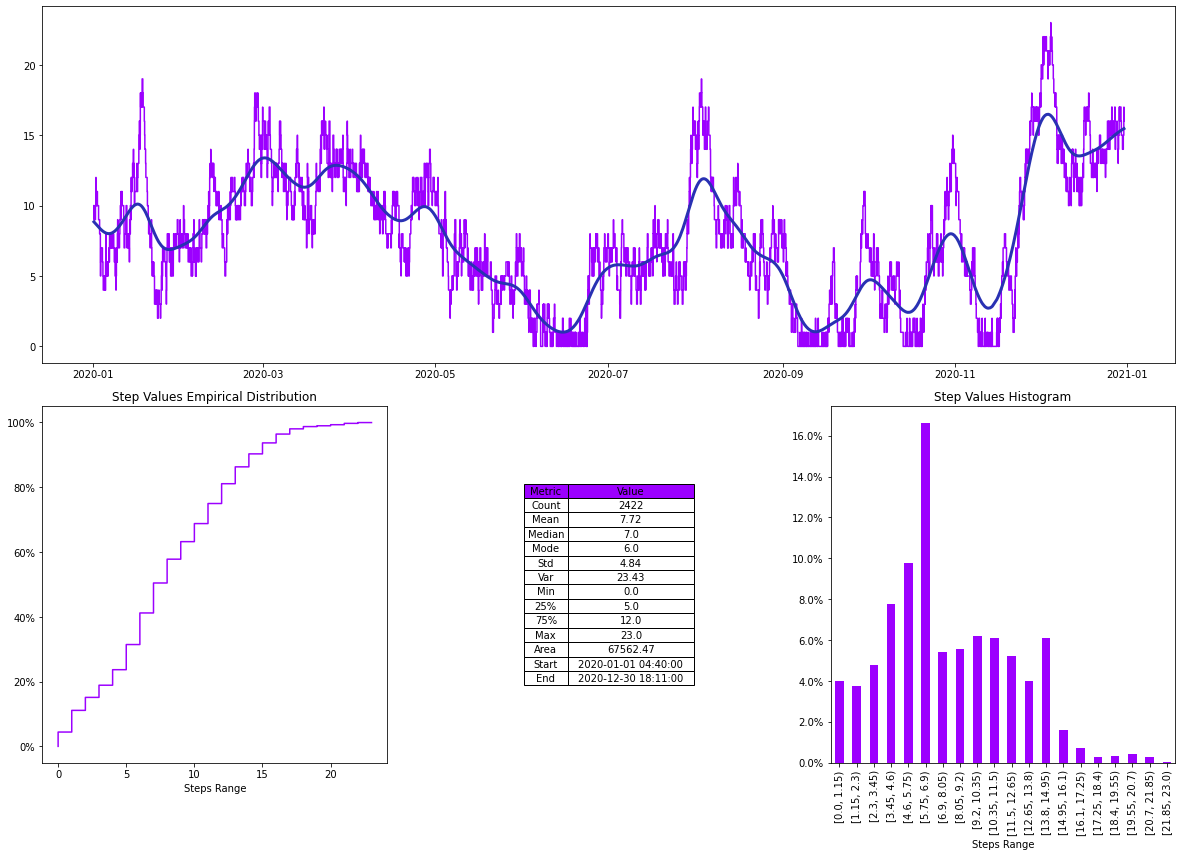

In [2]:
vessel_queue = samples.vessel_queue_sample()
axes = vessel_queue.summary()

Now for some interesting slicing and dicing. Let's say we want to have a look only at the data for the month of August. We want to isolate and analyse the August data, so we need to isolate portion out so we can further explore it, we also wish to ensure we pretend that the rest of the data doesn't exist, for that we use the clamp function, this "clamps" the values before and after the bounds to zero, thus ensuring we don't get any influence from the lead in and out step values.

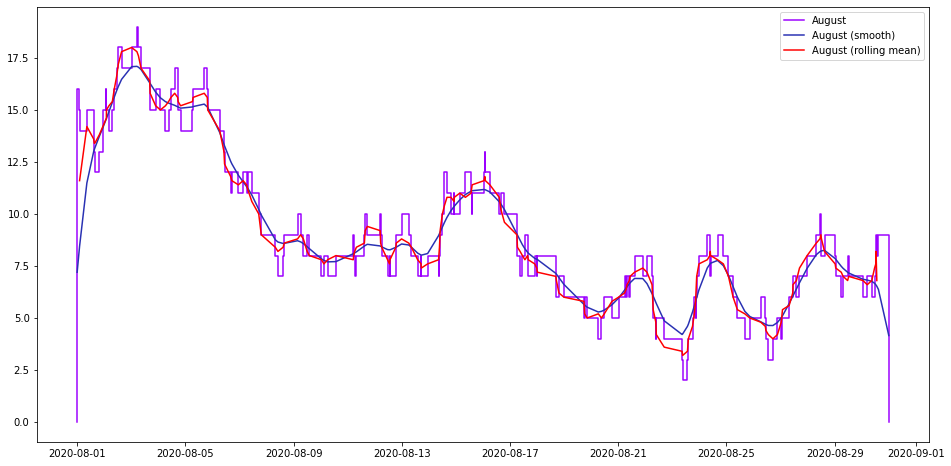

In [3]:
vessel_queue_august = vessel_queue.clamp(lbound=pd.Timestamp(2020,8,1),ubound=pd.Timestamp(2020,8,31))
ax = vessel_queue_august.plot(label='August')
ax = vessel_queue_august.plot(ax=ax,method='smooth',label='August (smooth)')
ax = vessel_queue_august.plot_rolling_step(ax=ax,rolling_function=np.mean,window=5,pre_mid_post='mid',label='August (rolling mean)',color='r');
ax.legend()

Before we do some "math", the smoothing might seem odd, as it seems to be effected by the clamped end points, this is reasonable, as the smoothing is being applied at each data point, since we have added zero end points, it is being applied with a value of zero there. If we want a proper smoothing for the section without this "artifact" of the clamping, we should use the clip method instead, the visual difference is obvious, hopefully. The clip method preserves the end point values, just like we "clipped" that section out of the original data, instead of zeroing out everything before and after, which is what the clamp method does. The clamp method is best for calculations involving the section, the clip is better for focusing on the section bearing in mind it is still part of the larger dataset.

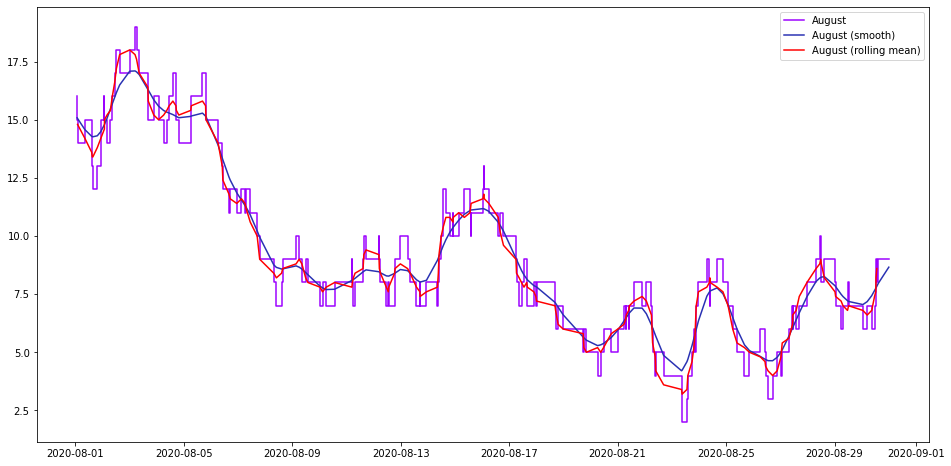

In [4]:
vessel_queue_august_clip = vessel_queue.clip(lbound=pd.Timestamp(2020,8,1),ubound=pd.Timestamp(2020,8,31))
ax = vessel_queue_august_clip.plot(label='August')
ax = vessel_queue_august_clip.plot(ax=ax,method='smooth',label='August (smooth)')
ax = vessel_queue_august_clip.plot_rolling_step(ax=ax,rolling_function=np.mean,window=5,pre_mid_post='mid',label='August (rolling mean)',color='r');
ax.legend()

Now we can slice, poke and prode to get answers, say, we only want to see when the queue was over 10, that's simple, we can apply the filter condition directly to the steps object.

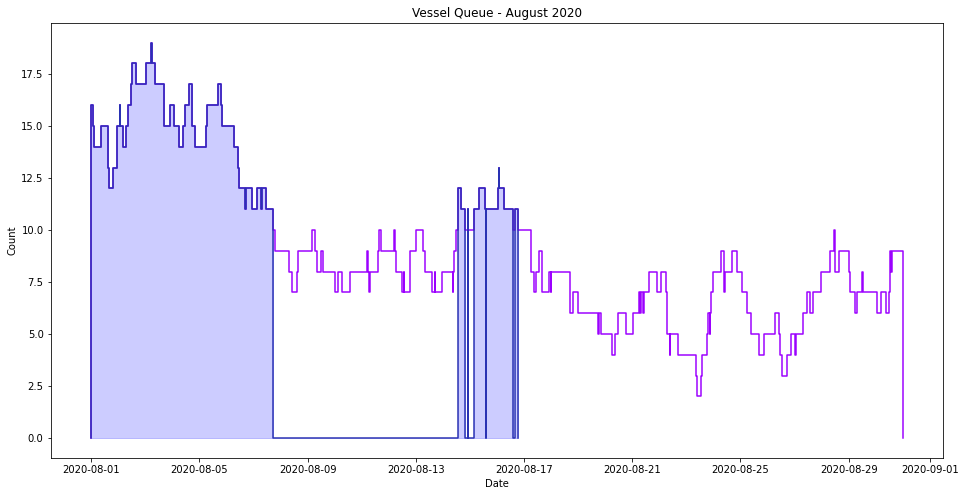

In [5]:
ax = vessel_queue_august.plot()
vessel_queue_august_gt10 = (vessel_queue_august > 10)
ax = vessel_queue_august_gt10.plot(ax=ax)

ax.fill_between(hs.utilities.prepare_datetime(vessel_queue_august_gt10.step_keys()),vessel_queue_august_gt10.step_values(),step='post',color='blue',alpha=0.2);

plt.setp(ax,title='Vessel Queue - August 2020', xlabel='Date',ylabel='Count');


what about how much of the time is the queue over 10 during August?

Queue greater than 10 for 28.4027778% of August. (ratio)
Queue greater than 10 for 28.4027778% of August. (divide)


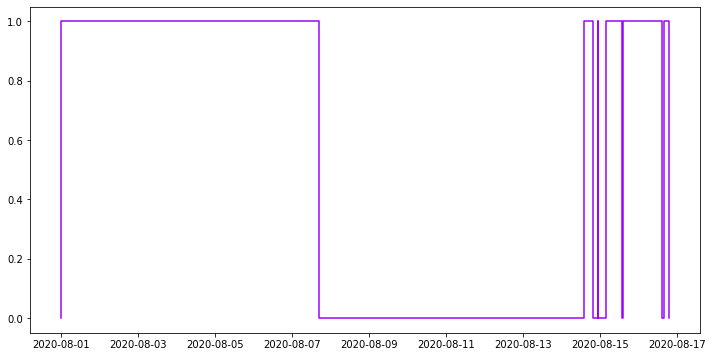

In [6]:
print(f'Queue greater than 10 for {100*vessel_queue_august_gt10.normalise().integrate()/vessel_queue_august.normalise().integrate():.7f}% of August. (ratio)')

#or if you like the math alittle differently
#we need the true span of the month of August for this data set, easiest way to get that is with a call to span_and_weights
start,end,span,weights = vessel_queue_august.span_and_weights()

#the span we get back is in seconds, we need to convert it to hours
duration = (60*60/span)
vessel_queue_august_gt10_norm = (vessel_queue_august_gt10/vessel_queue_august)
print(f'Queue greater than 10 for {100*vessel_queue_august_gt10_norm.integrate()*duration:.7f}% of August. (divide)')

#What we really did was normalised the filtered steps by the original by performing a true divide
vessel_queue_august_gt10_norm.plot(figsize=(12,6));

Ok, now let's really have a look at lots of conditions.

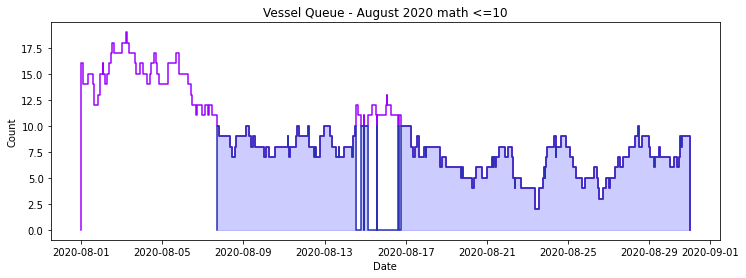

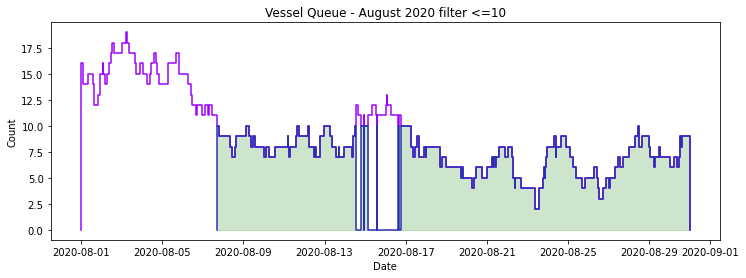

In [7]:
vessel_queue_august_le10 = (vessel_queue_august <= 10)

#we can also filter out the greater than 10 values by using another steps object that has the data we wish to remove and simply subtract it
vessel_queue_august_le10_math = vessel_queue_august - vessel_queue_august_gt10


ax = vessel_queue_august.plot(figsize=(12,4))
ax = vessel_queue_august_le10_math.plot(ax=ax)

ax.fill_between(hs.utilities.prepare_datetime(vessel_queue_august_le10_math.step_keys()),vessel_queue_august_le10_math.step_values(),step='post',color='blue',alpha=0.2);

plt.setp(ax,title='Vessel Queue - August 2020 math <=10', xlabel='Date',ylabel='Count');

ax = vessel_queue_august.plot(figsize=(12,4))
ax = vessel_queue_august_le10.plot(ax=ax)

ax.fill_between(hs.utilities.prepare_datetime(vessel_queue_august_le10.step_keys()),vessel_queue_august_le10.step_values(),step='post',color='green',alpha=0.2);

plt.setp(ax,title='Vessel Queue - August 2020 filter <=10', xlabel='Date',ylabel='Count');

In [8]:
vessel_queue_august_eq10 = (vessel_queue_august == 10)
vessel_queue_august_eq10 = (vessel_queue_august != 10)
vessel_queue_august_le10 = (vessel_queue_august <= 10)
